In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Train_Data=pd.read_csv("HousingTrain.csv") #Checking the training dataset

In [3]:
Test_Data=pd.read_csv("Housing Test.csv") #Checking the test dataset

In [4]:
Train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
Train_Data.columns #Checking the total columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
Test_Data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
Train_Data.isnull().sum() #Checking the null values of the train data

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
# For the train data- before imputing the null values, it can be seen that for few columns there are more 90% of null values.
# Hence dropping those columns

In [10]:
Train_Data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
Train_Data.isnull().sum() #Checking the null values of the train data after dropping the columns

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [12]:
Train_Data.info() #Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [13]:
Train_Data['LotFrontage']=Train_Data['LotFrontage'].fillna(Train_Data['LotFrontage'].mean())
Train_Data['BsmtQual']=Train_Data['BsmtQual'].fillna(Train_Data['BsmtQual'].mode()[0])
Train_Data['BsmtCond']=Train_Data['BsmtQual'].fillna(Train_Data['BsmtCond'].mode()[0])
Train_Data['BsmtExposure']=Train_Data['BsmtExposure'].fillna(Train_Data['BsmtExposure'].mode()[0])
Train_Data['BsmtFinType1']=Train_Data['BsmtFinType1'].fillna(Train_Data['BsmtFinType1'].mode()[0])
Train_Data['BsmtFinType2']=Train_Data['BsmtFinType2'].fillna(Train_Data['BsmtFinType2'].mode()[0])
Train_Data['FireplaceQu']=Train_Data['FireplaceQu'].fillna(Train_Data['FireplaceQu'].mode()[0])
Train_Data['GarageType']=Train_Data['GarageType'].fillna(Train_Data['GarageType'].mode()[0])
Train_Data['GarageYrBlt']=Train_Data['GarageYrBlt'].fillna(Train_Data['GarageYrBlt'].mean())
Train_Data['GarageFinish']=Train_Data['GarageFinish'].fillna(Train_Data['GarageFinish'].mode()[0])
Train_Data['GarageCars']=Train_Data['GarageCars'].fillna(Train_Data['GarageCars'].mean())
Train_Data['GarageArea']=Train_Data['GarageArea'].fillna(Train_Data['GarageArea'].mean())
Train_Data['GarageQual']=Train_Data['GarageQual'].fillna(Train_Data['GarageQual'].mode()[0])
Train_Data['GarageCond']=Train_Data['GarageCond'].fillna(Train_Data['GarageCond'].mode()[0])
Train_Data['MasVnrType']=Train_Data['MasVnrType'].fillna(Train_Data['MasVnrType'].mode()[0])
Train_Data['MasVnrArea']=Train_Data['MasVnrArea'].fillna(Train_Data['MasVnrArea'].mean())

In [14]:
Test_Data.isnull().sum() #Checking the null values of the train data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [15]:
Test_Data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
Test_Data.isnull().sum() #Checking the null values of the test data

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [17]:
Test_Data['LotFrontage']=Test_Data['LotFrontage'].fillna(Test_Data['LotFrontage'].mean())
Test_Data['BsmtQual']=Test_Data['BsmtQual'].fillna(Test_Data['BsmtQual'].mode()[0])
Test_Data['BsmtCond']=Test_Data['BsmtQual'].fillna(Test_Data['BsmtCond'].mode()[0])
Test_Data['BsmtExposure']=Test_Data['BsmtExposure'].fillna(Test_Data['BsmtExposure'].mode()[0])
Test_Data['BsmtFinType1']=Test_Data['BsmtFinType1'].fillna(Test_Data['BsmtFinType1'].mode()[0])
Test_Data['BsmtFinType2']=Test_Data['BsmtFinType2'].fillna(Test_Data['BsmtFinType2'].mode()[0])
Test_Data['FireplaceQu']=Test_Data['FireplaceQu'].fillna(Test_Data['FireplaceQu'].mode()[0])
Test_Data['GarageType']=Test_Data['GarageType'].fillna(Test_Data['GarageType'].mode()[0])
Test_Data['GarageYrBlt']=Test_Data['GarageYrBlt'].fillna(Test_Data['GarageYrBlt'].mean())
Test_Data['GarageFinish']=Test_Data['GarageFinish'].fillna(Test_Data['GarageFinish'].mode()[0])
Test_Data['GarageQual']=Test_Data['GarageQual'].fillna(Test_Data['GarageQual'].mode()[0])
Test_Data['MasVnrType']=Test_Data['MasVnrType'].fillna(Test_Data['MasVnrType'].mode()[0])
Test_Data['MasVnrArea']=Test_Data['MasVnrArea'].fillna(Test_Data['MasVnrArea'].mean())
Test_Data['Electrical']=Test_Data['Electrical'].fillna(Test_Data['Electrical'].mode()[0])
Test_Data['GarageCond']=Test_Data['GarageCond'].fillna(Test_Data['GarageCond'].mode()[0])

In [18]:
Train_Data.isnull().sum() # Checking the null values after imputing the data

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [19]:
Test_Data.isnull().sum() # Checking the null values after imputing the data

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [20]:
X=Train_Data.drop('SalePrice',axis=1)
Y=Train_Data['SalePrice'] # Dividing the data into targets and features

In [21]:
# As data has 81 columns, hence K-Best selection is used to understand the best features for price prediction

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
enc= LabelEncoder()

In [24]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofMatl','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
X[columns] = X[columns].apply(enc.fit_transform)

In [25]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofMatl','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
Test_Data[columns] = Test_Data[columns].apply(enc.fit_transform)

In [26]:
Features= SelectKBest(score_func=f_regression, k=25)
fit=Features.fit(X,Y)
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(X.columns)

In [27]:
Total_Score=pd.concat([columns,scores],axis=1)
Total_Score.columns=['Column','Score']
print(Total_Score.nlargest(25,'Score'))

          Column        Score
16   OverallQual  1925.310146
45     GrLivArea  1167.278131
60    GarageCars   760.625799
29      BsmtQual   754.737009
30      BsmtCond   754.737009
26     ExterQual   746.729944
61    GarageArea   724.282299
37   TotalBsmtSF   639.162482
52   KitchenQual   630.659595
42      1stFlrSF   615.032166
48      FullBath   518.998338
59  GarageFinish   472.788235
53  TotRmsAbvGrd   451.573798
18     YearBuilt   419.564317
19  YearRemodAdd   405.199690
25    MasVnrArea   319.254378
55    Fireplaces   312.273172
58   GarageYrBlt   309.521298
39     HeatingQC   230.953343
28    Foundation   189.817339
33    BsmtFinSF1   176.819524
66   OpenPorchSF   151.901231
43      2ndFlrSF   142.869824
3    LotFrontage   136.550260
65    WoodDeckSF   128.843420


In [28]:
NewX=X[['OverallQual','GrLivArea','GarageCars','BsmtQual','BsmtCond','ExterQual','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','GarageFinish','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','GarageYrBlt','HeatingQC','Foundation','BsmtFinSF1','OpenPorchSF','2ndFlrSF','LotFrontage','WoodDeckSF']]
NewX

,OverallQual,GrLivArea,GarageCars,BsmtQual,BsmtCond,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,...,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC,Foundation,BsmtFinSF1,OpenPorchSF,2ndFlrSF,LotFrontage,WoodDeckSF
0,6,958,2,2,2,3,440,1078,958,2,...,0.0,1,1977.0,4,1,120,205,0,70.98847,0
1,8,2217,2,3,3,2,621,2217,2217,2,...,0.0,1,1970.0,0,2,351,207,0,95.00000,81
2,7,2013,2,2,2,2,455,1117,1127,2,...,0.0,1,1997.0,0,2,862,130,886,92.00000,180
3,6,1844,2,2,2,3,546,1844,1844,2,...,480.0,1,1977.0,0,1,705,122,0,105.00000,0
4,6,1602,2,2,2,2,529,1602,1602,2,...,126.0,1,1977.0,2,1,1246,0,0,70.98847,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,900,1,3,3,3,280,882,900,1,...,31.0,0,1970.0,4,1,450,0,0,70.98847,0
1164,4,1126,2,3,3,3,520,0,1126,2,...,0.0,0,2002.0,0,1,0,96,0,67.00000,0
1165,6,1456,2,2,2,3,440,855,855,2,...,0.0,1,1976.0,4,1,566,0,601,24.00000,87
1166,4,1317,1,3,3,3,250,649,649,1,...,0.0,0,1920.0,4,0,0,54,668,50.00000,0


In [29]:
Testdata=X[['OverallQual','GrLivArea','GarageCars','BsmtQual','BsmtCond','ExterQual','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','GarageFinish','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea','Fireplaces','GarageYrBlt','HeatingQC','Foundation','BsmtFinSF1','OpenPorchSF','2ndFlrSF','LotFrontage','WoodDeckSF']]
Testdata

,OverallQual,GrLivArea,GarageCars,BsmtQual,BsmtCond,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,...,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC,Foundation,BsmtFinSF1,OpenPorchSF,2ndFlrSF,LotFrontage,WoodDeckSF
0,6,958,2,2,2,3,440,1078,958,2,...,0.0,1,1977.0,4,1,120,205,0,70.98847,0
1,8,2217,2,3,3,2,621,2217,2217,2,...,0.0,1,1970.0,0,2,351,207,0,95.00000,81
2,7,2013,2,2,2,2,455,1117,1127,2,...,0.0,1,1997.0,0,2,862,130,886,92.00000,180
3,6,1844,2,2,2,3,546,1844,1844,2,...,480.0,1,1977.0,0,1,705,122,0,105.00000,0
4,6,1602,2,2,2,2,529,1602,1602,2,...,126.0,1,1977.0,2,1,1246,0,0,70.98847,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,5,900,1,3,3,3,280,882,900,1,...,31.0,0,1970.0,4,1,450,0,0,70.98847,0
1164,4,1126,2,3,3,3,520,0,1126,2,...,0.0,0,2002.0,0,1,0,96,0,67.00000,0
1165,6,1456,2,2,2,3,440,855,855,2,...,0.0,1,1976.0,4,1,566,0,601,24.00000,87
1166,4,1317,1,3,3,3,250,649,649,1,...,0.0,0,1920.0,4,0,0,54,668,50.00000,0


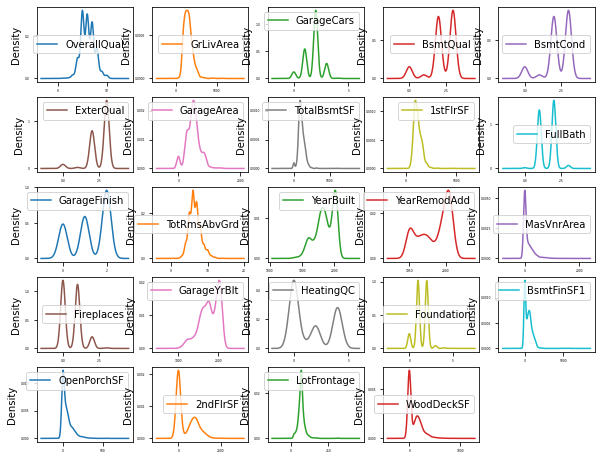

In [30]:
NewX.plot(kind='kde',subplots=True,layout=(5,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [31]:
NewX.skew().sort_values(ascending=False) #checking the skewness

MasVnrArea      2.834658
LotFrontage     2.710383
OpenPorchSF     2.410840
BsmtFinSF1      1.871606
TotalBsmtSF     1.744591
1stFlrSF        1.513707
WoodDeckSF      1.504929
GrLivArea       1.449952
2ndFlrSF        0.823479
Fireplaces      0.671966
TotRmsAbvGrd    0.644657
HeatingQC       0.449933
GarageArea      0.189665
OverallQual     0.175082
FullBath        0.057809
Foundation     -0.002761
GarageCars     -0.358556
GarageFinish   -0.450190
YearRemodAdd   -0.495864
YearBuilt      -0.579204
GarageYrBlt    -0.662934
BsmtCond       -1.343781
BsmtQual       -1.343781
ExterQual      -1.810843
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform

In [33]:
New_X=power_transform(NewX)

In [34]:
pd.DataFrame(New_X,columns=NewX.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

MasVnrArea      0.416370
TotalBsmtSF     0.286779
2ndFlrSF        0.280208
LotFrontage     0.161368
HeatingQC       0.156511
WoodDeckSF      0.113026
Fireplaces      0.084950
OverallQual     0.021658
Foundation      0.004296
TotRmsAbvGrd    0.002332
GrLivArea      -0.000054
1stFlrSF       -0.002391
OpenPorchSF    -0.002749
GarageCars     -0.022970
FullBath       -0.045944
YearBuilt      -0.126641
GarageYrBlt    -0.132523
YearRemodAdd   -0.225131
GarageArea     -0.320370
GarageFinish   -0.335248
BsmtFinSF1     -0.404528
BsmtCond       -0.413999
BsmtQual       -0.413999
ExterQual      -0.605112
dtype: float64

In [35]:
X=pd.DataFrame(New_X,columns=NewX.columns)

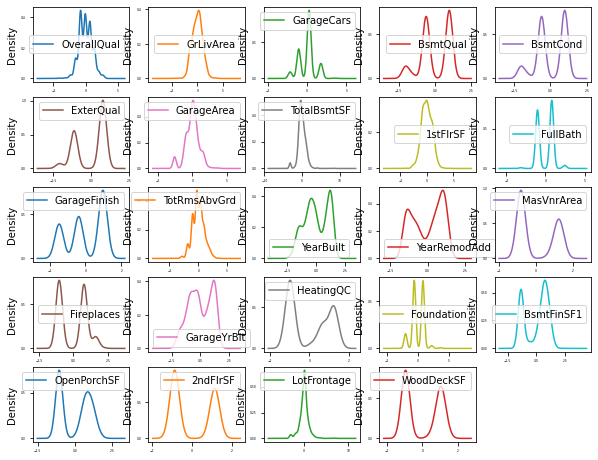

In [36]:
X.plot(kind='kde',subplots=True,layout=(5,5),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

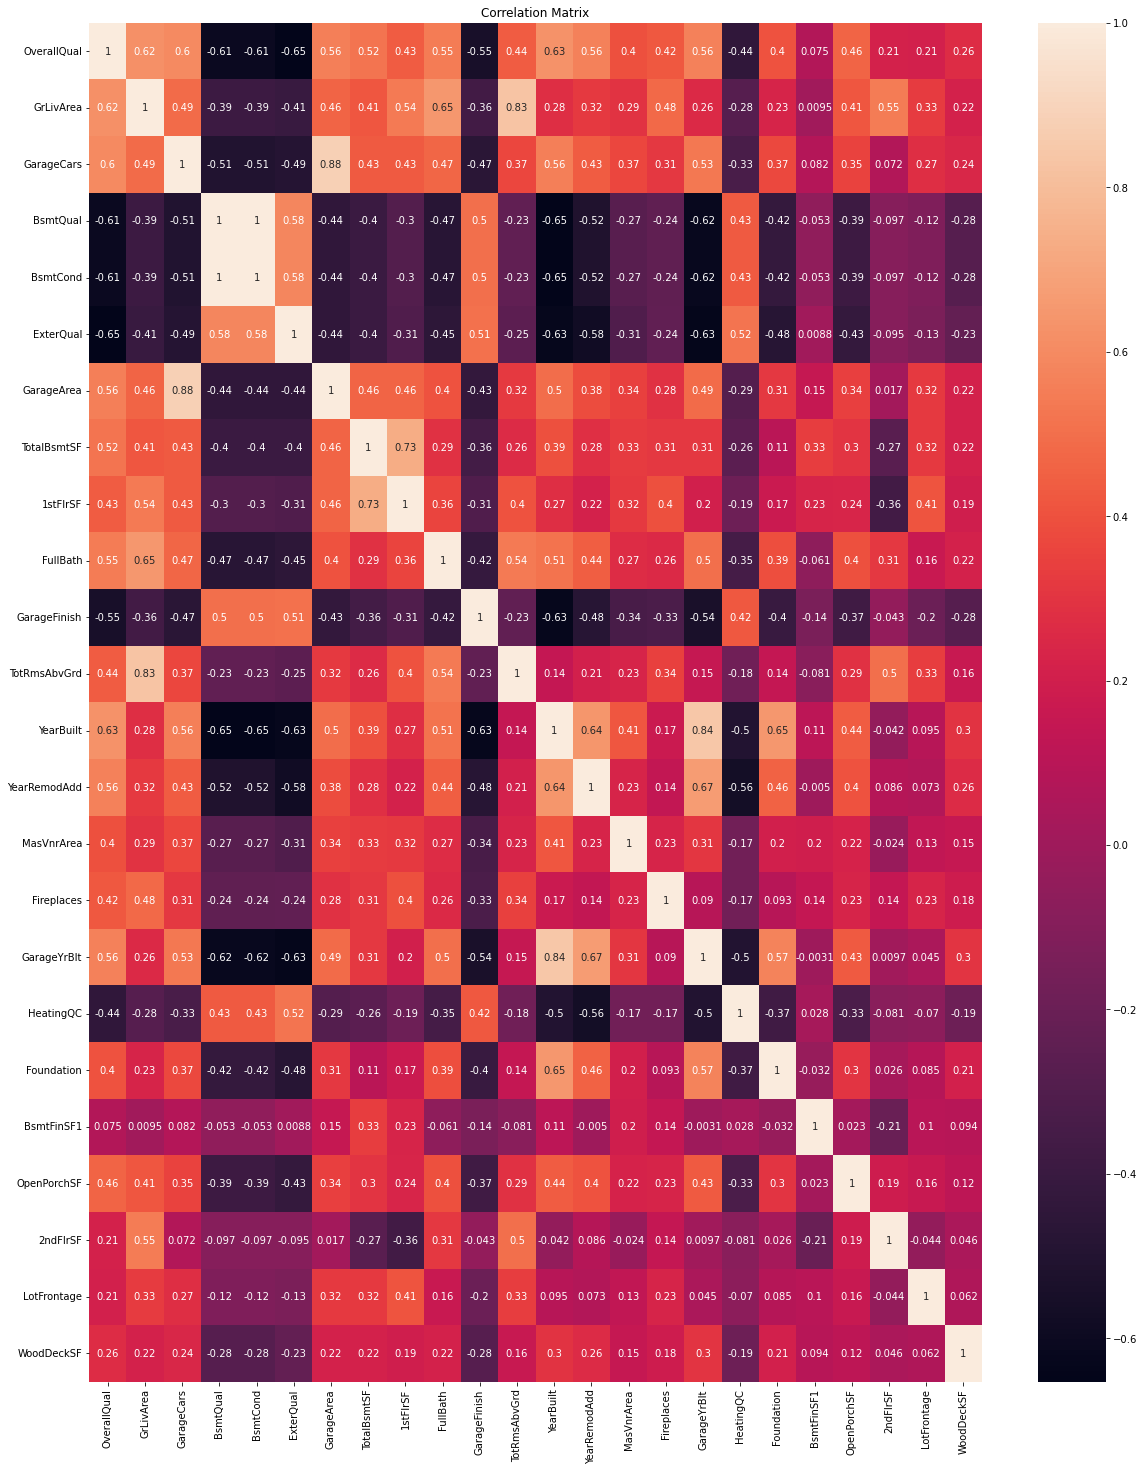

In [37]:
corr_mat=X.corr()
plt.figure(figsize=[20,25])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [38]:
# As far as the data concerned from heat map, high corelation is observed in basement quality and basement condition. Lets try with VIF

In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,OverallQual,3.315234
1,GrLivArea,19.498638
2,GarageCars,5.351208
3,BsmtQual,inf
4,BsmtCond,inf
5,ExterQual,2.402698
6,GarageArea,4.981370
7,TotalBsmtSF,3.060318
8,1stFlrSF,12.212694
9,FullBath,2.358885


In [40]:
X.drop('BsmtQual',axis=1,inplace=True)

In [45]:
Testdata.drop('BsmtQual',axis=1,inplace=True)

In [41]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,OverallQual,3.315234
1,GrLivArea,19.498638
2,GarageCars,5.351208
3,BsmtCond,2.158326
4,ExterQual,2.402698
5,GarageArea,4.981370
6,TotalBsmtSF,3.060318
7,1stFlrSF,12.212694
8,FullBath,2.358885
9,GarageFinish,1.946111


In [46]:
#Above grade (ground)(GrLivArea) living area square feet is the same data that is represented by First Floor square feet and second Floor square feet
# Therefore dropping these from test and train data

In [42]:
X.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [47]:
Testdata.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

In [48]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,OverallQual,3.261709
1,GrLivArea,5.866728
2,GarageCars,5.347618
3,BsmtCond,2.148281
4,ExterQual,2.401001
5,GarageArea,4.962258
6,TotalBsmtSF,1.890722
7,FullBath,2.341211
8,GarageFinish,1.941324
9,TotRmsAbvGrd,3.641823


In [49]:
# Multicollinearity issue has now been sorted

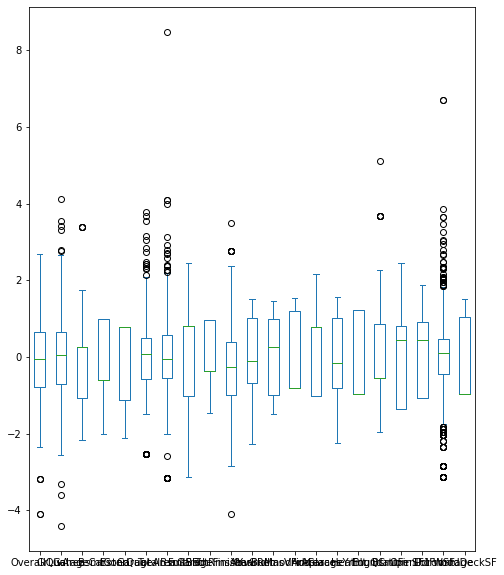

In [50]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [51]:
from scipy.stats import zscore

In [52]:
(np.abs(zscore(X)<3)).all()

OverallQual      True
GrLivArea       False
GarageCars      False
BsmtCond         True
ExterQual        True
GarageArea      False
TotalBsmtSF     False
FullBath         True
GarageFinish     True
TotRmsAbvGrd    False
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
Fireplaces       True
GarageYrBlt      True
HeatingQC        True
Foundation      False
BsmtFinSF1       True
OpenPorchSF      True
LotFrontage     False
WoodDeckSF       True
dtype: bool

In [53]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([  34,   48,   48,   48,   48,   52,   52,   54,   60,   86,   96,
         119,  121,  124,  137,  141,  141,  159,  177,  191,  195,  195,
         210,  211,  226,  231,  243,  249,  249,  249,  267,  305,  361,
         361,  370,  420,  432,  483,  491,  498,  504,  510,  517,  537,
         544,  558,  592,  592,  592,  592,  614,  644,  656,  691,  698,
         706,  735,  747,  758,  760,  772,  800,  831,  834,  846,  846,
         865,  884,  897,  899,  902,  908,  915,  935,  980,  980, 1025,
        1035, 1042, 1046, 1053, 1056, 1067, 1094, 1104, 1104, 1107, 1117,
        1120, 1126, 1144, 1147, 1148, 1164], dtype=int64),
 array([ 6,  0,  1,  6,  9,  0,  1,  6,  6,  6,  6,  7,  2,  6,  6,  1, 19,
         6, 16, 19, 16, 19, 16,  7,  6, 19,  6,  0,  1,  7,  6,  6,  1,  6,
         6, 19,  6,  7,  6, 16,  6,  0,  6, 19,  7, 19,  1,  5,  6, 19,  9,
         7, 19,  1, 19, 19,  6, 19, 19, 19,  5, 19, 19,  6,  0,  7, 19,  6,
         5,  6, 19,  6, 19,  6,  2,  5,  2,  

In [54]:
New_X = X[(np.abs(zscore(X))<3).all(axis=1)]
New_X

,OverallQual,GrLivArea,GarageCars,BsmtCond,ExterQual,GarageArea,TotalBsmtSF,FullBath,GarageFinish,TotRmsAbvGrd,...,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC,Foundation,BsmtFinSF1,OpenPorchSF,LotFrontage,WoodDeckSF
0,-0.052799,-1.236502,0.259753,-0.606202,0.778521,-0.113082,0.099335,0.802290,-0.376496,-0.984125,...,-0.613054,-0.822734,0.777879,-0.219139,1.231264,-0.558722,-0.112649,1.409990,0.093658,-0.959773
1,1.345826,1.295050,0.259753,0.982931,-1.124906,0.678810,2.374300,0.802290,0.972281,0.943901,...,-0.854247,-0.822734,0.777879,-0.505658,-0.968376,0.852373,0.394677,1.414498,1.117135,0.781991
2,0.656375,1.003880,0.259753,-0.606202,-1.124906,-0.045422,0.185571,0.802290,0.972281,0.943901,...,0.495717,-0.822734,0.777879,0.769650,-0.968376,0.852373,0.925416,1.198911,0.998803,1.043999
3,-0.052799,0.739356,0.259753,-0.606202,0.778521,0.356726,1.674462,0.802290,-0.376496,0.375729,...,-0.569998,1.382984,0.777879,-0.219139,-0.968376,-0.558722,0.797133,1.169545,1.495566,-0.959773
4,-0.052799,0.314931,0.259753,-0.606202,-1.124906,0.282610,1.200095,0.802290,-1.467967,0.943901,...,0.694762,1.138552,0.777879,-0.219139,0.661944,-0.558722,1.176115,-1.061392,0.093658,1.135369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,-2.341613,-1.548159,-1.063204,0.982931,0.778521,-1.271348,-0.389958,-1.018713,0.972281,-0.984125,...,-1.478940,-0.822734,-1.028333,-1.511980,1.231264,-1.965020,0.120352,-1.061392,-1.296356,-0.959773
1163,-0.785224,-1.424968,-1.063204,0.982931,0.778521,-0.865892,-0.347643,-1.018713,0.972281,-0.984125,...,-0.964508,0.788386,-1.028333,-0.505658,1.231264,-0.558722,0.530842,-1.061392,0.093658,-0.959773
1165,-0.052799,0.026617,0.259753,-0.606202,0.778521,-0.113082,-0.411204,0.802290,0.972281,0.375729,...,-0.613054,-0.822734,0.777879,-0.261788,1.231264,-0.558722,0.663505,-1.061392,-2.852857,0.805928
1166,-1.545782,-0.276125,-1.063204,0.982931,0.778521,-1.015037,-0.915738,-1.018713,0.972281,-0.260346,...,-1.478940,-0.822734,-1.028333,-1.908049,1.231264,-1.965020,-1.347679,0.794809,-0.996296,-0.959773


In [55]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1162     58500
1163    122000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1089, dtype: int64

In [56]:
New_X.shape # Checking the shape of X and Y after removing Outliers

(1089, 21)

In [57]:
Y_new.shape # Checking the shape of X and Y after removing Outliers

(1089,)

In [59]:
Scalar=StandardScaler()

In [60]:
X_Scaled=Scalar.fit_transform(New_X)
X_Scaled

array([[-0.09859076, -1.3363421 ,  0.25995446, ...,  1.38217617,
         0.10106507, -0.97594068],
       [ 1.39641172,  1.36740337,  0.25995446, ...,  1.38669106,
         1.27311012,  0.76580805],
       [ 0.65945083,  1.05642844,  0.25995446, ...,  1.17074992,
         1.13760085,  1.02781403],
       ...,
       [-0.09859076,  0.0126929 ,  0.25995446, ..., -1.0932726 ,
        -3.2731638 ,  0.78974467],
       [-1.69445354, -0.31064138, -1.12809175, ...,  0.76598274,
        -1.14710557, -0.97594068],
       [-0.09859076,  0.12790642,  0.25995446, ...,  0.91672675,
         0.10106507,  0.83612318]])

# Linear Regression

In [63]:
LR=LinearRegression()

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 83.66504953665496


# Decision Tree Regressor

In [65]:
DT=DecisionTreeRegressor()

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 66.61352107885887


# Random Forest Regressor

In [67]:
rf=RandomForestRegressor()

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
rf.fit(X_train,y_train)
pred_test=rf.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 85.52395463859415


# Gradient Boosting

In [71]:
GB=GradientBoostingRegressor()

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 86.66187602268887


# Cross Validation for LR

In [76]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for Linear Regressor",i,"is",LR_Val.mean())

The cross validation score for Linear Regressor 2 is 0.8099555120612187
The cross validation score for Linear Regressor 3 is 0.8165233974276257
The cross validation score for Linear Regressor 4 is 0.8165572438206878
The cross validation score for Linear Regressor 5 is 0.8132481644785304


# Cross Validation for DT

In [77]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y_new,cv=i)
    print("The cross validation score for Decision Tree Regressor",i,"is",DT_Val.mean())

The cross validation score for Decision Tree Regressor 2 is 0.7001601206866955
The cross validation score for Decision Tree Regressor 3 is 0.7354424014889114
The cross validation score for Decision Tree Regressor 4 is 0.7002785021394589
The cross validation score for Decision Tree Regressor 5 is 0.7238830226633229


# Cross Validation for RF

In [79]:
for i in range(2,6):
    RF_Val=cross_val_score(rf,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 83.45543872118004
The cross validation score for 3 is 85.87326337278839
The cross validation score for 4 is 86.04839891223044
The cross validation score for 5 is 85.63141513051768


# Cross Validation for GB

In [80]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is 85.7902333179118
The cross validation score for 3 is 87.15819308502503
The cross validation score for 4 is 86.93685769382368
The cross validation score for 5 is 86.57363515177636


In [81]:
# Therefore from the above r squared score and cross validation data, Gradient Boosting is the perfect model for this dataset

# None of the model tested above is overfitted and score is highest for Gradient Boosting with 86.66%

# Hypertuning Parameter

In [82]:
gb=GradientBoostingRegressor()

In [84]:
Parameters={'criterion':['mse', 'mae'],'min_samples_split':[3,4],'min_samples_leaf':[2,3]}
clf=GridSearchCV(gb,Parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4]})

In [85]:
clf.best_params_ #taking the best parameters

{'criterion': 'mse', 'min_samples_leaf': 3, 'min_samples_split': 4}

In [86]:
gb=GradientBoostingRegressor(criterion='mse',min_samples_leaf=3,min_samples_split=4)

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
gb.fit(X_train,y_train)
pred_test=gb.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 86.93172876007162


In [92]:
# Though the above score increased with hyper parameter tuning, lets see if we change few more parameters if the score increases.


In [90]:
gb=GradientBoostingRegressor(criterion='mae',min_samples_leaf=2,min_samples_split=3)

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=50)
gb.fit(X_train,y_train)
pred_test=gb.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 88.24863201774133


In [93]:
# Score increased

## Now testing with the test data

In [94]:
Testdata.skew().sort_values(ascending=False)

MasVnrArea      2.834658
LotFrontage     2.710383
OpenPorchSF     2.410840
BsmtFinSF1      1.871606
TotalBsmtSF     1.744591
WoodDeckSF      1.504929
GrLivArea       1.449952
Fireplaces      0.671966
TotRmsAbvGrd    0.644657
HeatingQC       0.449933
GarageArea      0.189665
OverallQual     0.175082
FullBath        0.057809
Foundation     -0.002761
GarageCars     -0.358556
GarageFinish   -0.450190
YearRemodAdd   -0.495864
YearBuilt      -0.579204
GarageYrBlt    -0.662934
BsmtCond       -1.343781
ExterQual      -1.810843
dtype: float64

In [95]:
Test=power_transform(Testdata)

In [97]:
pd.DataFrame(Test,columns=Testdata.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

MasVnrArea      0.416370
TotalBsmtSF     0.286779
LotFrontage     0.161368
HeatingQC       0.156511
WoodDeckSF      0.113026
Fireplaces      0.084950
OverallQual     0.021658
Foundation      0.004296
TotRmsAbvGrd    0.002332
GrLivArea      -0.000054
OpenPorchSF    -0.002749
GarageCars     -0.022970
FullBath       -0.045944
YearBuilt      -0.126641
GarageYrBlt    -0.132523
YearRemodAdd   -0.225131
GarageArea     -0.320370
GarageFinish   -0.335248
BsmtFinSF1     -0.404528
BsmtCond       -0.413999
ExterQual      -0.605112
dtype: float64

In [99]:
Test_New=pd.DataFrame(Test,columns=Testdata.columns)

In [98]:
# Muticollinearity has already been checked in the above columns

In [100]:
(np.abs(zscore(Test_New)<3)).all() #Checking Outliers

OverallQual      True
GrLivArea       False
GarageCars      False
BsmtCond         True
ExterQual        True
GarageArea      False
TotalBsmtSF     False
FullBath         True
GarageFinish     True
TotRmsAbvGrd    False
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
Fireplaces       True
GarageYrBlt      True
HeatingQC        True
Foundation      False
BsmtFinSF1       True
OpenPorchSF      True
LotFrontage     False
WoodDeckSF       True
dtype: bool

In [102]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(Test_New))>3)
index

(array([  34,   48,   48,   48,   48,   52,   52,   54,   60,   86,   96,
         119,  121,  124,  137,  141,  141,  159,  177,  191,  195,  195,
         210,  211,  226,  231,  243,  249,  249,  249,  267,  305,  361,
         361,  370,  420,  432,  483,  491,  498,  504,  510,  517,  537,
         544,  558,  592,  592,  592,  592,  614,  644,  656,  691,  698,
         706,  735,  747,  758,  760,  772,  800,  831,  834,  846,  846,
         865,  884,  897,  899,  902,  908,  915,  935,  980,  980, 1025,
        1035, 1042, 1046, 1053, 1056, 1067, 1094, 1104, 1104, 1107, 1117,
        1120, 1126, 1144, 1147, 1148, 1164], dtype=int64),
 array([ 6,  0,  1,  6,  9,  0,  1,  6,  6,  6,  6,  7,  2,  6,  6,  1, 19,
         6, 16, 19, 16, 19, 16,  7,  6, 19,  6,  0,  1,  7,  6,  6,  1,  6,
         6, 19,  6,  7,  6, 16,  6,  0,  6, 19,  7, 19,  1,  5,  6, 19,  9,
         7, 19,  1, 19, 19,  6, 19, 19, 19,  5, 19, 19,  6,  0,  7, 19,  6,
         5,  6, 19,  6, 19,  6,  2,  5,  2,  

In [103]:
Test_data = X[(np.abs(zscore(Test_New))<3).all(axis=1)]
Test_data

,OverallQual,GrLivArea,GarageCars,BsmtCond,ExterQual,GarageArea,TotalBsmtSF,FullBath,GarageFinish,TotRmsAbvGrd,...,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,HeatingQC,Foundation,BsmtFinSF1,OpenPorchSF,LotFrontage,WoodDeckSF
0,-0.052799,-1.236502,0.259753,-0.606202,0.778521,-0.113082,0.099335,0.802290,-0.376496,-0.984125,...,-0.613054,-0.822734,0.777879,-0.219139,1.231264,-0.558722,-0.112649,1.409990,0.093658,-0.959773
1,1.345826,1.295050,0.259753,0.982931,-1.124906,0.678810,2.374300,0.802290,0.972281,0.943901,...,-0.854247,-0.822734,0.777879,-0.505658,-0.968376,0.852373,0.394677,1.414498,1.117135,0.781991
2,0.656375,1.003880,0.259753,-0.606202,-1.124906,-0.045422,0.185571,0.802290,0.972281,0.943901,...,0.495717,-0.822734,0.777879,0.769650,-0.968376,0.852373,0.925416,1.198911,0.998803,1.043999
3,-0.052799,0.739356,0.259753,-0.606202,0.778521,0.356726,1.674462,0.802290,-0.376496,0.375729,...,-0.569998,1.382984,0.777879,-0.219139,-0.968376,-0.558722,0.797133,1.169545,1.495566,-0.959773
4,-0.052799,0.314931,0.259753,-0.606202,-1.124906,0.282610,1.200095,0.802290,-1.467967,0.943901,...,0.694762,1.138552,0.777879,-0.219139,0.661944,-0.558722,1.176115,-1.061392,0.093658,1.135369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,-2.341613,-1.548159,-1.063204,0.982931,0.778521,-1.271348,-0.389958,-1.018713,0.972281,-0.984125,...,-1.478940,-0.822734,-1.028333,-1.511980,1.231264,-1.965020,0.120352,-1.061392,-1.296356,-0.959773
1163,-0.785224,-1.424968,-1.063204,0.982931,0.778521,-0.865892,-0.347643,-1.018713,0.972281,-0.984125,...,-0.964508,0.788386,-1.028333,-0.505658,1.231264,-0.558722,0.530842,-1.061392,0.093658,-0.959773
1165,-0.052799,0.026617,0.259753,-0.606202,0.778521,-0.113082,-0.411204,0.802290,0.972281,0.375729,...,-0.613054,-0.822734,0.777879,-0.261788,1.231264,-0.558722,0.663505,-1.061392,-2.852857,0.805928
1166,-1.545782,-0.276125,-1.063204,0.982931,0.778521,-1.015037,-0.915738,-1.018713,0.972281,-0.260346,...,-1.478940,-0.822734,-1.028333,-1.908049,1.231264,-1.965020,-1.347679,0.794809,-0.996296,-0.959773


In [104]:
Test_Scaled=Scalar.fit_transform(Test_data)
Test_Scaled

array([[-0.09859076, -1.3363421 ,  0.25995446, ...,  1.38217617,
         0.10106507, -0.97594068],
       [ 1.39641172,  1.36740337,  0.25995446, ...,  1.38669106,
         1.27311012,  0.76580805],
       [ 0.65945083,  1.05642844,  0.25995446, ...,  1.17074992,
         1.13760085,  1.02781403],
       ...,
       [-0.09859076,  0.0126929 ,  0.25995446, ..., -1.0932726 ,
        -3.2731638 ,  0.78974467],
       [-1.69445354, -0.31064138, -1.12809175, ...,  0.76598274,
        -1.14710557, -0.97594068],
       [-0.09859076,  0.12790642,  0.25995446, ...,  0.91672675,
         0.10106507,  0.83612318]])

In [106]:
# Test Data Prediction

Test_Data_Prediction=gb.predict(Test_Scaled)

In [107]:
Test_Data_Prediction

array([134286.8144868 , 262694.91068562, 224894.82844967, ...,
       147835.33168201,  95056.57293032, 179506.42590194])

# Saving the model

In [108]:
import pickle
filename='Housing Price Prediction.pkl'
pickle.dump(gb,open(filename,'wb')) ##saving the model